In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[100 101  97 ... 102 104 102]
 [105 103  99 ...  99  89  96]
 [107 104 100 ...  86  77  87]
 ...
 [130 165 142 ... 160 153 153]
 [115 150 139 ... 135 142 131]
 [135 130 147 ... 157 146 135]]


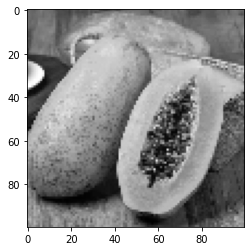

In [ ]:
datadir = "/content/drive/MyDrive/AI test/Fruit "
categories=['dudu','dau','duahau','mit','nho','oi','saurieng','tao','thanhlong','xoai']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
#creating training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 20/20 [00:16<00:00,  1.25it/s]

200


In [ ]:
#saving (x:picture), (y:label)
X=[]
y=[]
for features, label in training_data :
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('X',X.shape)
print('y',y.shape)

X (200, 100, 100, 1)
y (200,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/AI test/Fruit /save/X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/AI test/Fruit /save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
pickle_in = open("/content/drive/MyDrive/AI test/Group FaceID/save/X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/AI test/Group FaceID/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (22, 100, 100, 1)
y (22,)


In [ ]:
y= to_categorical(y,11)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=30,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/30
1/1 [==============================] - 12s 12s/step - loss: 3.3955 - accuracy: 0.1053 - val_loss: 18.3644 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 58ms/step - loss: 12.3807 - accuracy: 0.1053 - val_loss: 11.9214 - val_accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 0s 48ms/step - loss: 6.9939 - accuracy: 0.2632 - val_loss: 7.0765 - val_accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 0s 44ms/step - loss: 3.4214 - accuracy: 0.2105 - val_loss: 4.6286 - val_accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 0s 45ms/step - loss: 2.5417 - accuracy: 0.1053 - val_loss: 3.4647 - val_accuracy: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 0s 51ms/step - loss: 2.3034 - accuracy: 0.2105 - val_loss: 2.8321 - val_accuracy: 0.0000e+00
Epoch 7/30
1/1 [==============================] - 0s 44ms/step - loss: 2.3325 - accuracy: 0.1053 - val_loss: 2.8197 - val_accuracy: 0.0000e

In [ ]:
model.save('Fruit.h5')

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
expectation mit


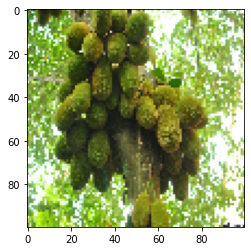

In [ ]:
labels = {0: 'dudu',
          1: 'dau',
          2: 'duahau',
          3: 'mit',
          4: 'nho',
          5: 'oi',
          6: 'saurieng',
          7: 'tao',
          8: 'thanhlong',
          9: 'xoai',          
          }
model = load_model('Fruit.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI test/Fruit /mit/mit (14).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
expectation mit


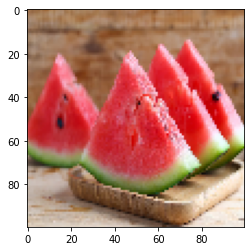

In [ ]:
model = load_model('Fruit.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI test/Fruit /duahau/duahau (20).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(11,11),0,0)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 4.2307841e-11 0.0000000e+00
  0.0000000e+00 9.9999869e-01 0.0000000e+00 6.1682067e-13 1.3492906e-06
  0.0000000e+00]]
expectation saurieng


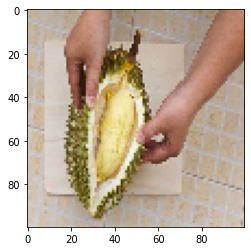

In [ ]:
model = load_model('Fruit.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI test/Fruit /saurieng/saurieng (6).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(11,11),0,0)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation tao


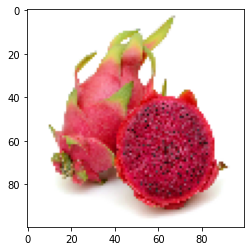

In [ ]:
model = load_model('Fruit.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI test/Fruit /thanhlong/thanhlong (20).png')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(11,11),0,0)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation tao


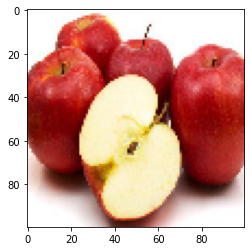

In [ ]:
model = load_model('Fruit.h5')
img = load_image('/content/drive/MyDrive/AI test/Fruit /tao/tao (13).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img,(11,11),0,0)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 